## <font color="maroon"><h4 align="center">Pandas Group By</font>

**In this tutorial we are going to look at weather data from various cities and see how group by can be used to run some analytics.** 

In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,01-01-2017,new york,32,6,Rain
1,01-02-2017,new york,36,7,Sunny
2,01-03-2017,new york,28,12,Snow
3,01-04-2017,new york,33,7,Sunny
4,01-01-2017,mumbai,90,5,Sunny
5,01-02-2017,mumbai,85,12,Fog
6,01-03-2017,mumbai,87,15,Fog
7,01-04-2017,mumbai,92,5,Rain
8,01-01-2017,paris,45,20,Sunny
9,01-02-2017,paris,50,13,Cloudy


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          12 non-null     object
 1   city         12 non-null     object
 2   temperature  12 non-null     int64 
 3   windspeed    12 non-null     int64 
 4   event        12 non-null     object
dtypes: int64(2), object(3)
memory usage: 612.0+ bytes


### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?


In [3]:
g = df.groupby("city")
g

**DataFrameGroupBy object looks something like below,**

<img src="group_by_cities.png">

In [4]:
for city, data in g:
    print("city:",city)
    print()
    print("data:\n",data)    

city: mumbai

data:
           day    city  temperature  windspeed  event
4  01-01-2017  mumbai           90          5  Sunny
5  01-02-2017  mumbai           85         12    Fog
6  01-03-2017  mumbai           87         15    Fog
7  01-04-2017  mumbai           92          5   Rain
city: new york

data:
           day      city  temperature  windspeed  event
0  01-01-2017  new york           32          6   Rain
1  01-02-2017  new york           36          7  Sunny
2  01-03-2017  new york           28         12   Snow
3  01-04-2017  new york           33          7  Sunny
city: paris

data:
            day   city  temperature  windspeed   event
8   01-01-2017  paris           45         20   Sunny
9   01-02-2017  paris           50         13  Cloudy
10  01-03-2017  paris           54          8  Cloudy
11  01-04-2017  paris           42         10  Cloudy


**This is similar to SQL,**

**SELECT * from weather_data GROUP BY city**

In [5]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,01-01-2017,mumbai,90,5,Sunny
5,01-02-2017,mumbai,85,12,Fog
6,01-03-2017,mumbai,87,15,Fog
7,01-04-2017,mumbai,92,5,Rain


In [6]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,01-04-2017,92,15,Sunny
new york,01-04-2017,36,12,Sunny
paris,01-04-2017,54,20,Sunny


In [7]:
g.mean(numeric_only=True)

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


**This method of splitting your dataset in smaller groups and then applying an operation 
(such as min or max) to get aggregate result is called Split-Apply-Combine. It is illustrated in a diagram below**

<img src="split_apply_combine.png">

In [8]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,01-01-2017,85,5,Fog
new york,01-01-2017,28,6,Rain
paris,01-01-2017,42,8,Cloudy


In [9]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [10]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [11]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


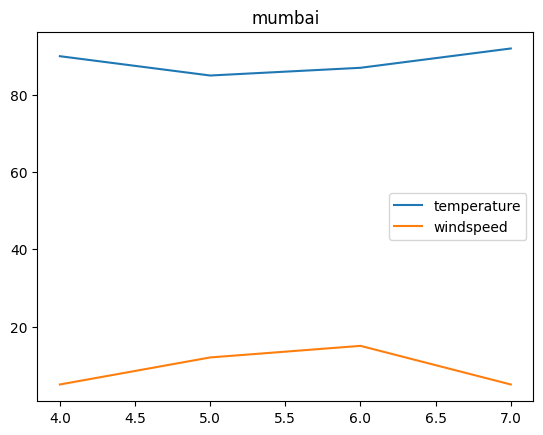

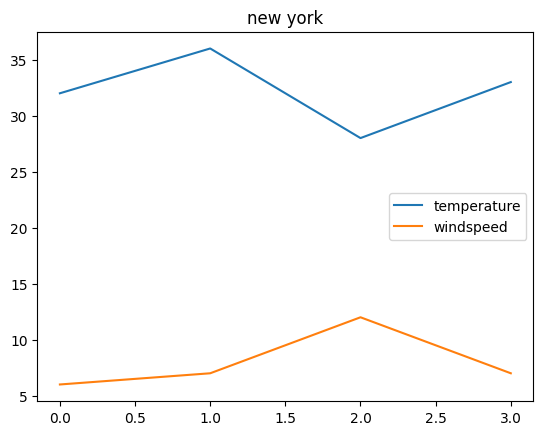

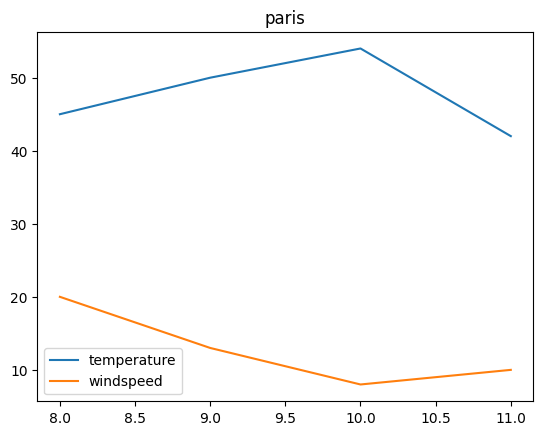

In [12]:
for city, data in g:
    data.plot(title=str(city))

<h4>Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups<h4>
<ol>
    <li>Days when temperature was between 80 and 90</li>
    <li>Days when it was between 50 and 60</li>
    <li>Days when it was anything else</li>
</ol>

For this you need to write custom grouping function and pass that to groupby

In [13]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [14]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [15]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

           day   city  temperature  windspeed   event
9   01-02-2017  paris           50         13  Cloudy
10  01-03-2017  paris           54          8  Cloudy
Group by Key: 80-90

          day    city  temperature  windspeed  event
4  01-01-2017  mumbai           90          5  Sunny
5  01-02-2017  mumbai           85         12    Fog
6  01-03-2017  mumbai           87         15    Fog
Group by Key: others

           day      city  temperature  windspeed   event
0   01-01-2017  new york           32          6    Rain
1   01-02-2017  new york           36          7   Sunny
2   01-03-2017  new york           28         12    Snow
3   01-04-2017  new york           33          7   Sunny
7   01-04-2017    mumbai           92          5    Rain
8   01-01-2017     paris           45         20   Sunny
11  01-04-2017     paris           42         10  Cloudy
